In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

   Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spore_print_color population  habitat

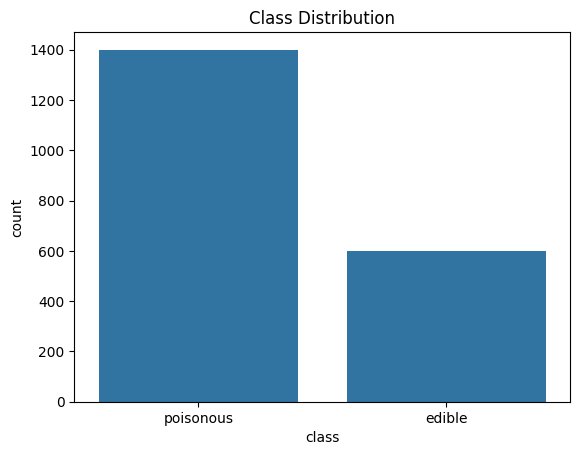

In [2]:
df = pd.read_csv('/content/mushroom.csv')

# Exploratory Data Analysis (EDA)
# Display the first few rows of the dataset
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Summary statistics
print(df.describe())

# Drop the first unnamed column
df = df.iloc[:, 1:]

# Check the distribution of the target variable 'class'
print(df['class'].value_counts())

# Visualize the distribution of the target variable
sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.show()

In [3]:
# Data Preprocessing
# Encode categorical variables using LabelEncoder
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        le = LabelEncoder()
        df[column] = le.fit_transform(df[column])
        label_encoders[column] = le

In [4]:
# Split the dataset into features (X) and target (y)
X = df.drop('class', axis=1)
y = df['class']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Data Visualization
# Pairplot to visualize relationships between features
sns.pairplot(df, hue='class')
plt.show()

# Correlation heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# SVM Implementation
# Initialize the SVM classifier
svm_classifier = SVC(kernel='linear', random_state=42)

# Train the SVM model
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Output hidden; open in https://colab.research.google.com to view.

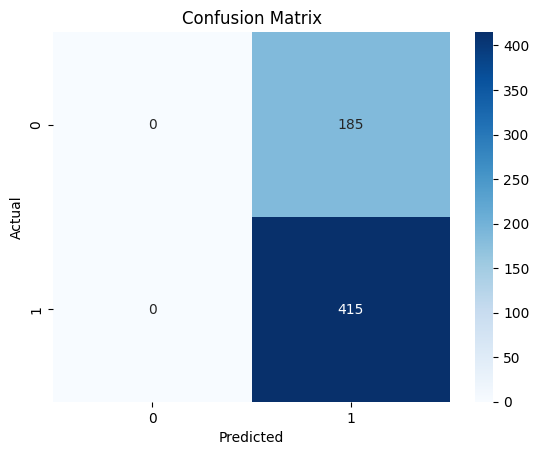

In [5]:
# Visualization of SVM Results
# Confusion Matrix Visualization
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [6]:
# Parameter Tuning and Optimization
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [1, 0.1, 0.01],
    'kernel': ['linear', 'rbf']
}

# Perform Grid Search
grid_search = GridSearchCV(SVC(), param_grid, refit=True, verbose=1, cv=5)
grid_search.fit(X_train, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
best_svm = grid_search.best_estimator_

# Evaluate the optimized model
y_pred_best = best_svm.predict(X_test)
print("Optimized Accuracy:", accuracy_score(y_test, y_pred_best))
print("Optimized Classification Report:\n", classification_report(y_test, y_pred_best))

# Comparison and Analysis
# Compare SVM performance with different kernels
kernels = ['linear', 'rbf', 'poly']
for kernel in kernels:
    svm = SVC(kernel=kernel, random_state=42)
    svm.fit(X_train, y_train)
    y_pred_kernel = svm.predict(X_test)
    print(f"Kernel: {kernel}")
    print("Accuracy:", accuracy_score(y_test, y_pred_kernel))
    print("Classification Report:\n", classification_report(y_test, y_pred_kernel))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_kernel))
    print("\n")


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END ......................C=0.1, gamma=1, kernel=linear; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.2s
[CV] END .........................C=0.1, gamma=1, kernel=rbf; total time=   0.1s
[CV] END ....................C=0.1, gamma=0.1, kernel=linear; total time=   0.1s
[CV] END ....................C=0.1, gamma=0.1, k

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

Kernel: poly
Accuracy: 0.7183333333333334
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.09      0.16       185
           1       0.71      1.00      0.83       415

    accuracy                           0.72       600
   macro avg       0.86      0.54      0.50       600
weighted avg       0.80      0.72      0.62       600

Confusion Matrix:
 [[ 16 169]
 [  0 415]]




In [7]:
# Practical Implications
# Discuss the strengths and weaknesses of SVM for this dataset
print("Strengths of SVM:")
print("- Effective in high-dimensional spaces.")
print("- Works well with clear margin of separation.")
print("- Versatile with different kernel functions.")

print("\nWeaknesses of SVM:")
print("- Not suitable for large datasets due to high training time.")
print("- Requires careful tuning of hyperparameters.")
print("- Can be less effective with overlapping classes.")

Strengths of SVM:
- Effective in high-dimensional spaces.
- Works well with clear margin of separation.
- Versatile with different kernel functions.

Weaknesses of SVM:
- Not suitable for large datasets due to high training time.
- Requires careful tuning of hyperparameters.
- Can be less effective with overlapping classes.
